# Analyze Star Wars survey data with Python

In [11]:
import pandas as pd
import requests

## Download the data

Let's download the data using __requests__ module

In [9]:
data = requests.get("https://raw.githubusercontent.com/fivethirtyeight/data/master/star-wars-survey/StarWars.csv")

Now let's write the text from __data__ to a new file called __star_wars__

In [10]:
with open("star_wars.csv", "w+") as file:
    file.write(data.text)

## Loading the data into __pandas__

In [14]:
df = pd.read_csv("star_wars.csv")
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


The first row needs to be removed, so letś do that

In [15]:
df = df.iloc[1:]
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning the first two columns

In [90]:
cleaned_df = df[["RespondentID", "Have you seen any of the 6 films in the Star Wars franchise?", "Do you consider yourself to be a fan of the Star Wars film franchise?"]].copy()
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,Yes,Yes
2,3.292880e+09,No,NaN
3,3.292765e+09,Yes,No
4,3.292763e+09,Yes,Yes
5,3.292731e+09,Yes,Yes


In [91]:
# Convert 'Yes'/'No' strings to Boolean... It is easier to work with Booleans in Python
yes_no = {
    "Yes": True,
    "No": False
}

cleaned_df["Have you seen any of the 6 films in the Star Wars franchise?"] = cleaned_df["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
cleaned_df["Do you consider yourself to be a fan of the Star Wars film franchise?"] = cleaned_df["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True


In [92]:
# Check number of people that have seen any of the films vs none
cleaned_df["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [93]:
# Check number of people that considered themselves fans of the franchise vs those who don't
cleaned_df["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Analyzing the movies that have been seen the most

In [94]:
cleaned_df = cleaned_df.merge(df.iloc[:,3:9], left_index=True, right_index=True)
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [95]:
# Convert columns 3:9 to Boolean (easier to work with)
# If cell is empty, we put a 'False', otherwise, it gets filled with 'True'
cleaned_df[cleaned_df.columns[3:]] = cleaned_df.iloc[:,3:].notnull()
cleaned_df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


Let's rename the columns

In [96]:
columns = ["id", "seen_any", "fan", "seen_1", "seen_2", "seen_3", "seen_4", "seen_5", "seen_6"]
cleaned_df.columns = columns
cleaned_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True


In [97]:
# Let's check total answers on each row (not NaN's)
total = cleaned_df.iloc[:,1:].apply(lambda x: x.count())
total

seen_any    1186
fan          836
seen_1      1186
seen_2      1186
seen_3      1186
seen_4      1186
seen_5      1186
seen_6      1186
dtype: int64

In [98]:
# Check number of True/False answers per column
counts = cleaned_df.iloc[:,1:].apply(pd.value_counts)
counts

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,250,284,513,615,636,579,428,448
True,936,552,673,571,550,607,758,738


In [99]:
# Check percentage of people that answer True or False
percentages = counts / total
percentages

,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
False,0.210793,0.339713,0.432546,0.51855,0.536256,0.488196,0.360877,0.37774
True,0.789207,0.660287,0.567454,0.48145,0.463744,0.511804,0.639123,0.62226


Text(0, 0.5, 'Percentage %')

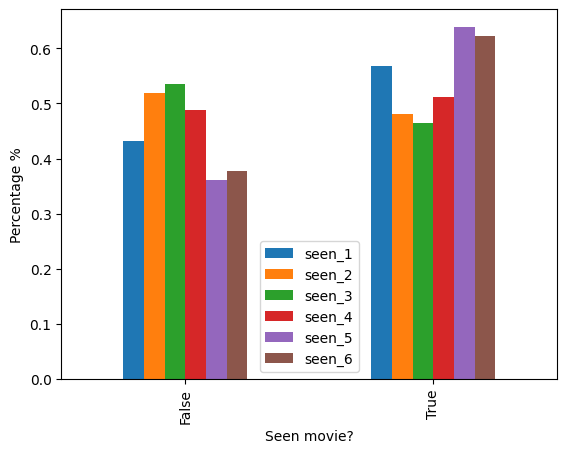

In [100]:
# let's plot percentages
ax = percentages.iloc[:,2:].plot.bar()
ax.set_xlabel("Seen movie?")
ax.set_ylabel("Percentage %")

## Finding everyone's favorite movie

In [101]:
# Add columns from original df to cleaned_df
cleaned_df = cleaned_df.merge(df.iloc[:,9:15], left_index=True, right_index=True)
cleaned_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3


Check data type of added coumns, and we cans ee that they are not numbers

In [102]:
cleaned_df.iloc[:,9].dtype

dtype('O')

In [103]:
# Convert data to int
cleaned_df[cleaned_df.columns[9:]] = cleaned_df[cleaned_df.columns[9:]].astype(float)

# Check new type
cleaned_df.iloc[:,9].dtype

dtype('float64')

Rename new columns

In [104]:
columns += ["movie_1", "movie_2", "movie_3", "movie_4", "movie_5", "movie_6"]
cleaned_df.columns = columns
cleaned_df.head()

,id,seen_any,fan,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0


In [105]:
# Let's compute the mean of each ranking column
mean_ranking = cleaned_df.iloc[:,9:].mean()
mean_ranking

movie_1    3.732934
movie_2    4.087321
movie_3    4.341317
movie_4    3.272727
movie_5    2.513158
movie_6    3.047847
dtype: float64

Text(0, 0.5, 'Avg. ranking')

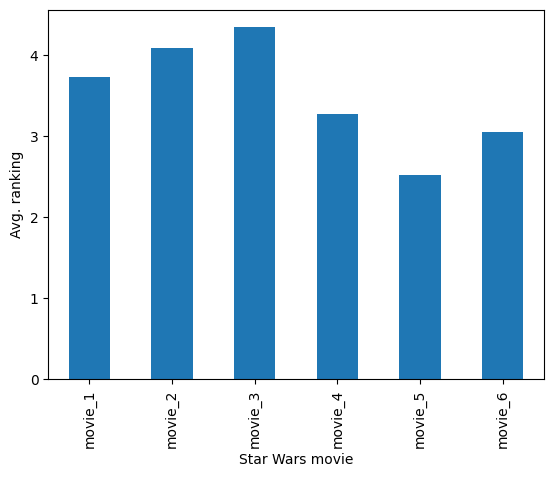

In [106]:
# plot result
ax = mean_ranking.plot.bar()
ax.set_xlabel("Star Wars movie")
ax.set_ylabel("Avg. ranking")